In [3]:
import pandas as pd
import numpy as np
# import sagemaker
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv("games.csv")
print(games.shape) # 50872 rows x 13 columns
games.head(5)

# games.describe()

(50872, 13)


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [29]:
# detail in columns : 분석에 필요할 것 같은 column만 디테일 카운트 확인
print('mac user count\n',games['mac'].value_counts())
print('\nlinux user count\n',games['linux'].value_counts())
print('\nrating count\n',games['rating'].value_counts())
print('\nsteam deck availablity\n',games['steam_deck'].value_counts())

# 확률 표기) 예시 : steam deck availability
print('\nsteam deck availability(normalized)',games['steam_deck'].value_counts(normalize=True))

mac user count
 False    37854
True     13018
Name: mac, dtype: int64

linux user count
 False    41831
True      9041
Name: linux, dtype: int64

rating count
 Positive                   13502
Very Positive              13139
Mixed                      12157
Mostly Positive             8738
Mostly Negative             1849
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: rating, dtype: int64

steam deck availablity
 True     50870
False        2
Name: steam_deck, dtype: int64

steam deck availability(normalized) True     0.999961
False    0.000039
Name: steam_deck, dtype: float64


In [7]:
# games 출시 연도대로 sort

def convert_release


games['date_release'] = games['date_release'].replace('-','')
games['date_release'].head()
games['date_release'] = pd.to_datetime(games['date_release'])
games = games.sort_values("date_release")
games['date_release'].head()

15005   1997-06-30
31261   1997-11-14
47376   1998-11-08
8617    1999-04-01
34507   1999-09-08
Name: date_release, dtype: datetime64[ns]

In [7]:
games2 = pd.read_csv('merged_data.csv')

# nan value 존재하는 row 제거 -> kaggle dataset이라 nan값은 존재하지 않음
games = games.dropna(axis = 0) # nan값 존재X
games2 = games2.dropna(axis = 0) # nan값 존재
# users = users.dropna(axis = 0)
# print(len(games))

# $ 없애고 단순 숫자 비교 / Free => 0으로 값 전체 변경
games2["Original Price"] = games2["Original Price"].str.replace("$", "")
games2["Original Price"] = games2["Original Price"].str.replace("Free", "0")

games2["Discounted Price"] = games2["Discounted Price"].str.replace("$", "")
games2["Discounted Price"] = games2["Discounted Price"].str.replace("Free", "0")

games2.head()

# all reviews number / recent reviews number에서 퍼센트랑 숫자 뽑기


/tmp/ipykernel_19577/3760291315.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  games2["Original Price"] = float(games2["Original Price"].str.replace("$", ""))


TypeError: cannot convert the series to <class 'float'>

In [91]:
def positivePerc(dataset, column): 
    import re
    for item in dataset[column]:
#         print(item)
        numbers = re.findall(r"\d+", item) # ['94', '188617'] 순서대로 %, 전체 리뷰 수
        item = int(numbers[0]) * 0.01 * int(numbers[1]) # 퍼센트 계산해서 실질 긍정 리뷰 유저 수 계산
        
        
positivePerc(games2, "All Reviews Number")
print(games2.head())
#     - 96% of the 128,900 user reviews in the last ...

                              Title Original Price Discounted Price  \
0                   Baldur's Gate 3         $29.99           $29.99   
1  Counter-Strike: Global Offensive         $14.99           $14.99   
2                     Apex Legends™           Free             Free   
3                   Forza Horizon 5         $34.78           $17.39   
4                     Call of Duty®           Free             Free   

   Release Date                                               Link  \
0   3 Aug, 2023  https://store.steampowered.com/app/1086940/Bal...   
1  21 Aug, 2012  https://store.steampowered.com/app/730/Counter...   
2   4 Nov, 2020  https://store.steampowered.com/app/1172470/Ape...   
3   8 Nov, 2021  https://store.steampowered.com/app/1551360/For...   
4  27 Oct, 2022  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldur’s Gate 3 is a story-rich, party-based R...  Overwhelmingly Po

In [5]:
# detail in columns : 분석에 필요할 것 같은 column만 디테일 카운트 확인2
print('game features\n',games2['Game Features'].value_counts())
print('\nTags\n',games2['Popular Tags'].value_counts())
print('\nsupported languages\n',games2['Supported Languages'].value_counts())
print('\nAll reviews summary\n',games2['All Reviews Summary'].value_counts())

game features
 ['Single-player']                                                                                                                                                               17262
['Single-player', 'Steam Achievements']                                                                                                                                          6626
['Single-player', 'Full controller support']                                                                                                                                     3046
['Single-player', 'Partial Controller Support']                                                                                                                                  2607
['Single-player', 'Steam Achievements', 'Full controller support']                                                                                                               2448
                                                                           

In [80]:
# games2 tag가 리스트로 주어지고 중복이 많아서, 중복 없는 하나의 리스트를 뽑고 그 중에서 특정 태그가 포함된 게임을 찾을 수 있는 함수
# tag들 끼리 상관관계를 알아봐도 좋을 것 같음


def tagOnly(columnValue):
    gameTag = games2[columnValue]
    gameTags= []
    gameTags.extend(gameTag) # 이중 리스트
    # print(gameTags)

    gameTagsList = set()
    for sublist in gameTags:
        subTagsList = []
    #   print(sublist) # 전체가 string type
        sublist = sublist.replace('[', '')
        sublist = sublist.replace(']','')
        sublist = sublist.replace(', ', '')
        subTagsList = sublist.split('\'')
        
        for item in subTagsList:
            gameTagsList.add(item)
            
    return gameTagsList

popularTags = tagOnly('Popular Tags')
# print(popularTags)

# 예시 : tag중 'Mars'가 들어간 열 모두 찾아 출력
mars_cols = games2.loc[games2["Popular Tags"].str.contains("Mars"), :]

# 출력
print(mars_cols.head())

                      Title Original Price Discounted Price  Release Date  \
802         Deliver Us Mars         $19.99           $13.39   2 Feb, 2023   
912          Surviving Mars         $14.49           $14.49  15 Mar, 2018   
1034   Mars First Logistics         $19.99           $19.99  21 Jun, 2023   
1053  Occupy Mars: The Game         $12.49           $12.49  10 May, 2023   
1117           Astro Colony         $10.49           $10.49   7 Nov, 2022   

                                                   Link  \
802   https://store.steampowered.com/app/1345890/Del...   
912   https://store.steampowered.com/app/464920/Surv...   
1034  https://store.steampowered.com/app/1532200/Mar...   
1053  https://store.steampowered.com/app/758690/Occu...   
1117  https://store.steampowered.com/app/1614550/Ast...   

                                       Game Description  \
802   Deliver Us Mars is an atmospheric sci-fi adven...   
912   There will be challenges to overcome. Execute ...   
1034 

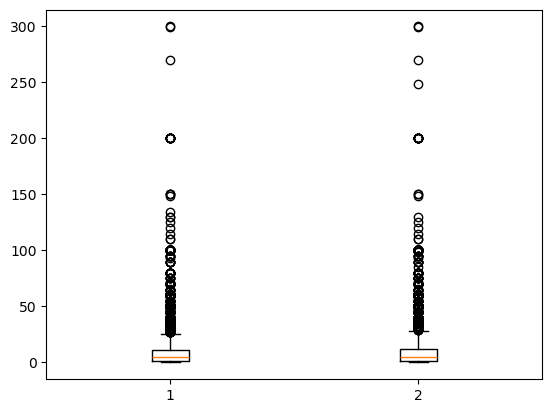

In [66]:
fig, ax = plt.subplots()
ax.boxplot([games['price_final'], games['price_original']])
# data = games['price_final']
# plt.boxplot(data)
plt.show()

NameError: name 'games2' is not defined

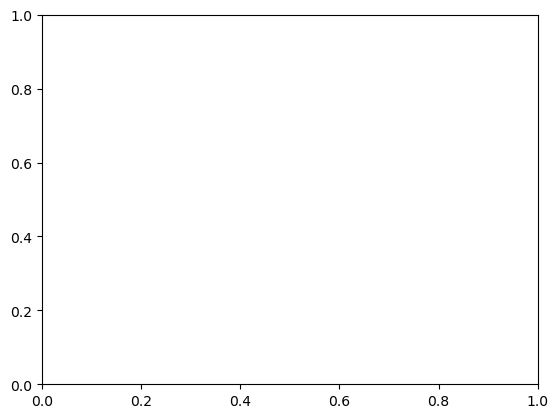

In [3]:
fig, ax = plt.subplots()
ax.boxplot([games2['price_final'], games2['price_original']])
# data = games['price_final']
# plt.boxplot(data)
plt.show()

In [ ]:
# outlier check

